# Alzheimer's Disease Prediction and Feature Analysis

This notebook demonstrates the process of predicting Alzheimer's Disease stages using various machine learning models, including Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest, with hyperparameter tuning. The dataset is analyzed, preprocessed, and balanced using SMOTE to handle class imbalance. Key metrics such as accuracy, precision, recall, and F1-score are used to evaluate model performance. Additionally, feature importance from the Random Forest model is visualized to understand the contribution of each feature to the model's predictions.

## Key Steps Covered:
1. **Data Loading and Cleaning**: Handling missing values and transforming categorical variables.
2. **Data Exploration**: Summary statistics, correlation matrix, and visualizations.
3. **Modeling**: Logistic Regression, SVM, KNN, and Random Forest with hyperparameter tuning using GridSearchCV.
4. **Class Imbalance Handling**: Using SMOTE to balance the dataset.
5. **Feature Importance**: Extracting and visualizing feature importances from the Random Forest model.

### 1. Importing Libraries
In this section, we import the necessary libraries for data manipulation, analysis, and visualization:
- `pandas`: Used for data manipulation and analysis.
- `numpy`: Used for numerical operations and handling arrays.
- `seaborn`: Used for creating attractive and informative statistical graphics.
- `matplotlib.pyplot`: Used for creating static, animated, and interactive visualizations.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading and Analyzing the Dataset
In this section, we load the dataset, check for missing values, determine data types, and classify columns into categorical and numerical types. A summary table is created to display the null values and data types for each column.


In [18]:
# Load the dataset
dataset = pd.read_csv(r"/Users/omdave/Documents/HANUMANDADA/Alzhjerirm/Alzheimer's dataset.csv")

# Check for null values in each column
null_values = dataset.isnull().sum()

# Determine the data types of each column
data_types = dataset.dtypes

# Identify categorical and numerical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()

# Creating a summary table
null_summary = pd.DataFrame({
    "Column Name": dataset.columns,
    "Data Type": ["Categorical" if col in categorical_columns else "Numerical" for col in dataset.columns],
    "Null Values": null_values.values
})
print(null_summary)

   Column Name    Data Type  Null Values
0   Subject ID  Categorical            0
1       MRI ID  Categorical            0
2        Group  Categorical            0
3        Visit    Numerical            0
4     MR Delay    Numerical            0
5          M/F  Categorical            0
6         Hand  Categorical            0
7          Age    Numerical            0
8         EDUC    Numerical            0
9          SES    Numerical           19
10        MMSE    Numerical            2
11         CDR    Numerical            0
12        eTIV    Numerical            0
13        nWBV    Numerical            0
14         ASF    Numerical            0


### 3. Data Cleaning: Imputing Missing Values
In this section, we handle missing values in the dataset. The 'SES' column is imputed using the mode (most frequent value), and the 'MMSE' column is imputed using the median. After imputation, the dataset is checked for any remaining missing values to ensure it is clean and ready for further analysis.


In [19]:
# Imputing the 'SES' column with mode
ses_mode = dataset['SES'].mode()[0]
dataset['SES'].fillna(ses_mode, inplace=True)

# Imputing the 'MMSE' column with median
mmse_median = dataset['MMSE'].median()
dataset['MMSE'].fillna(mmse_median, inplace=True)

# Verifying the imputation
imputation_check = dataset.isnull().sum()
print(imputation_check)

# Dataset is cleaned and ready for further analysis
dataset_cleaned = dataset

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_28946/3099324191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['SES'].fillna(ses_mode, inplace=True)
/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_28946/3099324191.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

### 4. Data Exploration: Summary Statistics and Correlation
In this section, we perform data exploration by:
- Generating summary statistics for numerical columns (e.g., mean, median, etc.).
- Displaying the distribution of categorical variables.
- Calculating the correlation matrix for numerical columns to understand relationships between variables.


In [20]:
# Summary Statistics for Numerical Columns
summary_statistics = dataset.describe()
print(summary_statistics)

# Distribution of Categorical Variables
categorical_distribution = dataset.select_dtypes(include=['object']).describe()
print(categorical_distribution)

# Calculate the correlation matrix for only numerical columns
correlation_matrix = dataset_cleaned[numerical_columns].corr()

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.436997   
std      0.922843   635.485118    7.640957    2.876339    1.109307   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  373.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.351206    0.290885  1488.128686    0.729568    1.195461  
std      3.675329    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

### 5. Visualizing Correlations and Pairwise Relationships
In this section, we use various visualization techniques to better understand the relationships between numerical columns:
- **Correlation Matrix Heatmap**: Visualizes the strength of correlations between variables.
- **Pairplot**: Displays pairwise relationships between all numerical columns.
- **Clustermap**: A heatmap that also clusters variables based on their similarity.
- **Significant Correlations**: Calculates and visualizes only statistically significant correlations (p < 0.05) using Pearson correlation.


# Correlation Matrix

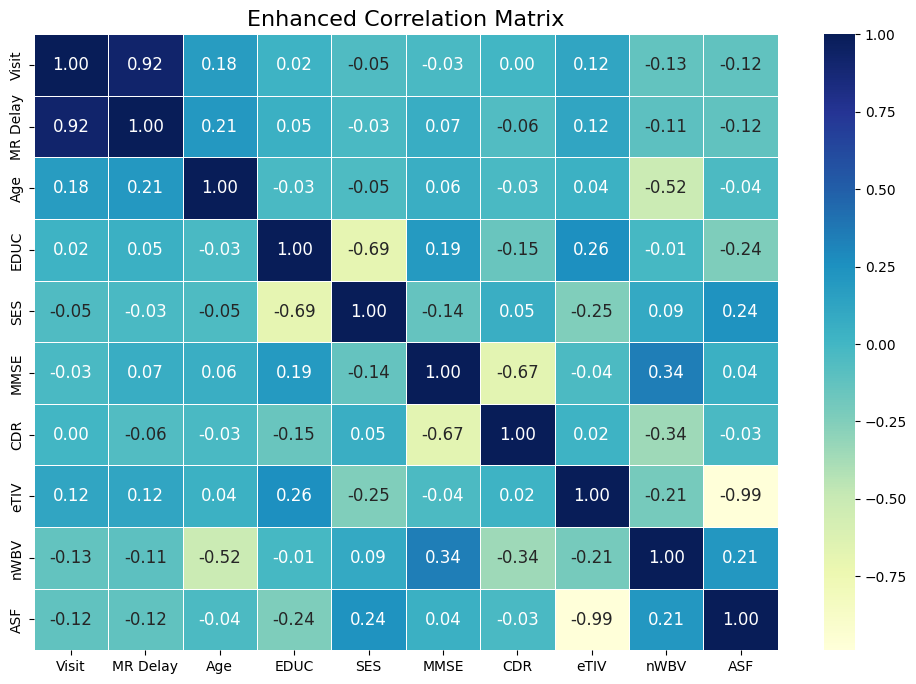

In [21]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title('Enhanced Correlation Matrix', fontsize=16)
plt.show()

### Observations from the Enhanced Correlation Matrix

1. **Strong Positive Correlations**:
   - **Visit and MR Delay**: There is a very strong positive correlation (0.92) between the number of visits and MR delay, suggesting that as the number of visits increases, the delay between them also increases.
   - **nWBV and Age**: Age shows a negative correlation (-0.52) with normalized whole brain volume (nWBV), indicating that brain volume decreases with age, which is consistent with cognitive decline in aging populations.

2. **Strong Negative Correlations**:
   - **eTIV and ASF**: There is a very strong negative correlation (-0.99) between estimated total intracranial volume (eTIV) and Atlas Scaling Factor (ASF). This suggests that as the total intracranial volume increases, ASF decreases, which is likely a result of how these measurements are calculated.
   - **CDR and MMSE**: The Clinical Dementia Rating (CDR) has a strong negative correlation (-0.67) with MMSE scores, which is expected as higher dementia ratings are associated with lower cognitive functioning (MMSE).

3. **Noteworthy Correlations**:
   - **EDUC and SES**: There is a moderate negative correlation (-0.69) between years of education and socio-economic status, implying that higher education may not necessarily correspond to higher SES in this sample.
   - **MMSE and nWBV**: MMSE has a moderate positive correlation (0.34) with normalized whole brain volume, suggesting that greater brain volume is associated with better cognitive function.

4. **Weak or No Correlation**:
   - Most other variables show either weak correlations or no significant correlations. For example, Age has a weak correlation with CDR (-0.15) and MMSE (0.06), indicating that while age is a factor, it may not be the sole determinant of cognitive decline.


# Pair Plot

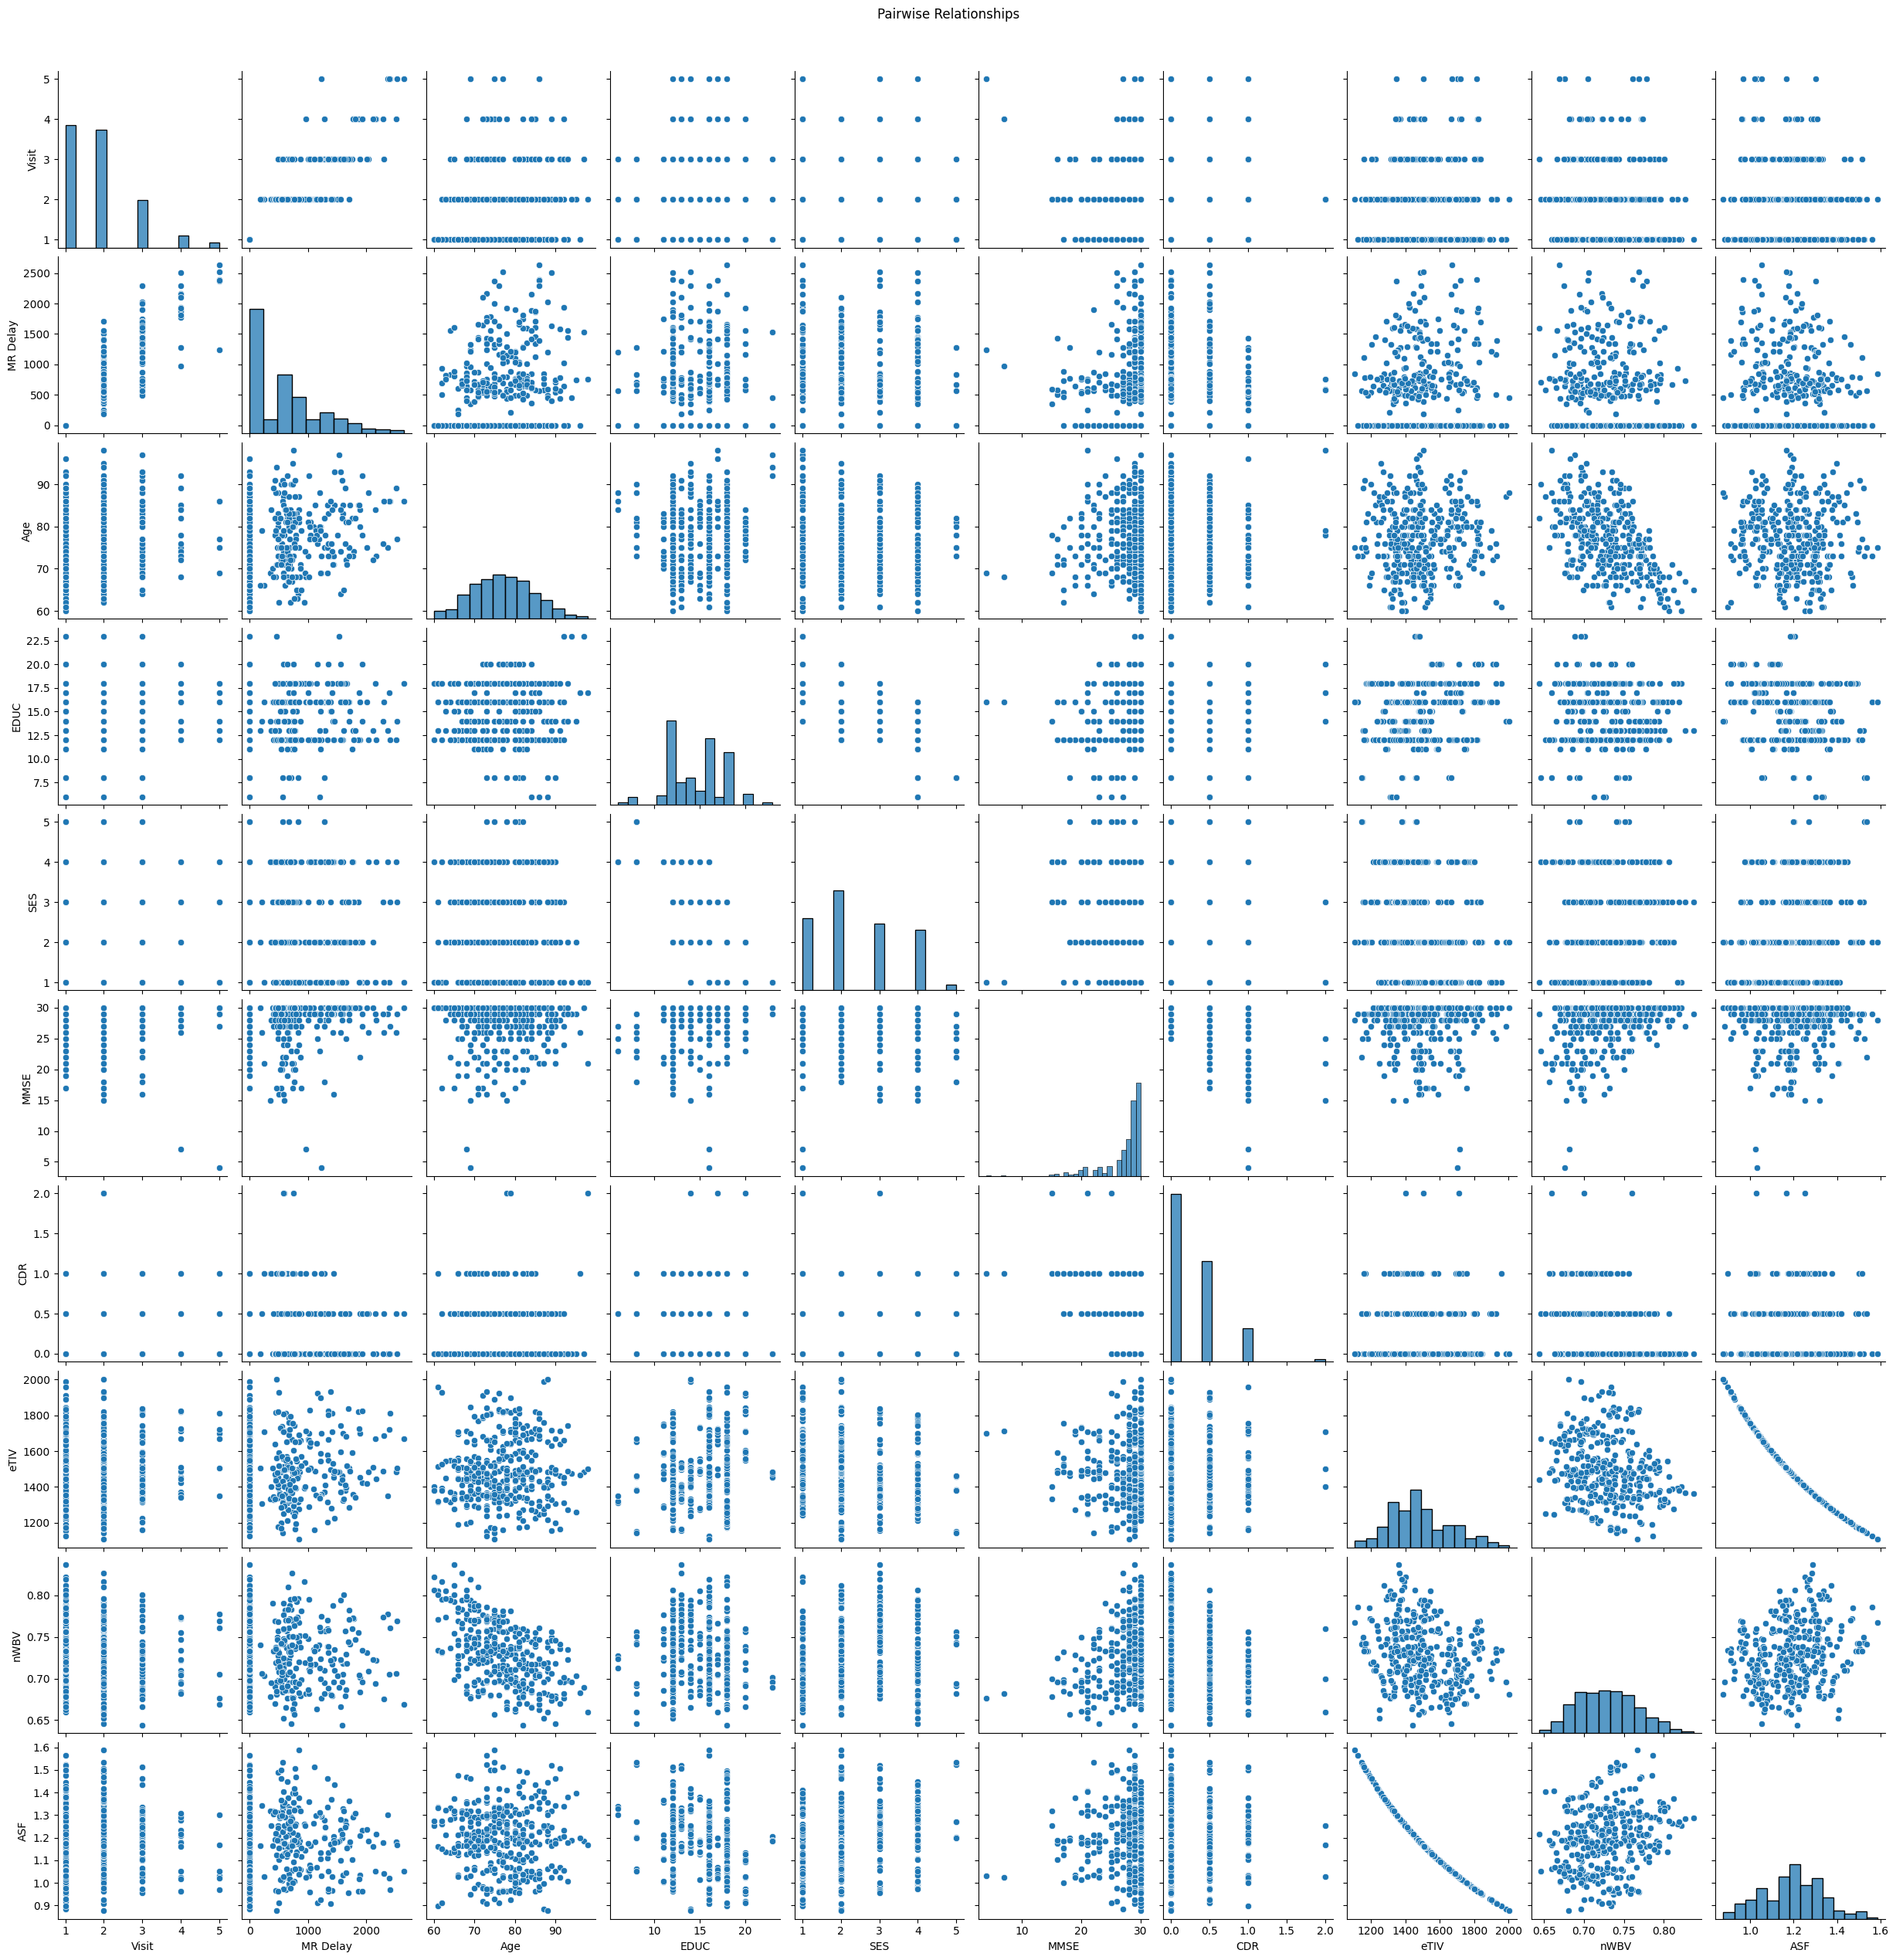

In [22]:
# Pairplot to show pairwise relationships for numerical columns
sns.pairplot(dataset_cleaned[numerical_columns])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

### Observations from Pairwise Relationships (Pairplot)

1. **Distributions of Numerical Features**:
   - **Age**: The age distribution is concentrated around 70 to 80 years, with fewer individuals in their 60s or late 90s, indicating that the majority of the sample is elderly, which aligns with the focus on Alzheimer's disease.
   - **MMSE**: The distribution of MMSE (Mini-Mental State Examination) is skewed towards higher scores (27-30), suggesting that most individuals in the dataset have normal or mildly impaired cognitive function.
   - **CDR**: Clinical Dementia Rating (CDR) values are mostly clustered around 0 (no dementia) and 0.5 (mild dementia), with fewer instances of more severe dementia.
   - **eTIV and nWBV**: Both eTIV (Estimated Total Intracranial Volume) and nWBV (Normalized Whole Brain Volume) show normal distributions, with eTIV having a wider spread compared to nWBV.

2. **Relationships Between Features**:
   - **Age vs. nWBV**: There is a visible negative relationship between age and normalized brain volume (nWBV), reinforcing the observation that brain volume decreases with age, which is expected in aging populations and those affected by Alzheimer's disease.
   - **MMSE vs. CDR**: There is a clear inverse relationship between MMSE and CDR, where higher MMSE scores (indicating better cognitive function) correspond to lower CDR values (indicating less severe dementia).
   - **eTIV vs. ASF**: The scatterplot between eTIV and ASF confirms the strong negative relationship observed earlier in the correlation matrix, where higher eTIV values are associated with lower ASF values.

3. **No Clear Relationships**:
   - Some features, such as **MR Delay** and **SES**, do not show strong or clear relationships with other variables. This suggests that these features may have less predictive power or may require further analysis (e.g., interaction terms or transformations) to identify any underlying patterns.

4. **Outliers**:
   - There are visible outliers in certain features such as **MR Delay** and **SES**, which may warrant further investigation to determine their impact on model performance or the overall data analysis.

### Conclusion:
The pairplot provides visual confirmation of relationships between certain features, such as age and brain volume, MMSE and dementia severity, and intracranial volume and scaling factor.


# Correlations

In [23]:
# Display correlation matrix as a table
print(correlation_matrix.round(2))


          Visit  MR Delay   Age  EDUC   SES  MMSE   CDR  eTIV  nWBV   ASF
Visit      1.00      0.92  0.18  0.02 -0.05 -0.03  0.00  0.12 -0.13 -0.12
MR Delay   0.92      1.00  0.21  0.05 -0.03  0.07 -0.06  0.12 -0.11 -0.12
Age        0.18      0.21  1.00 -0.03 -0.05  0.06 -0.03  0.04 -0.52 -0.04
EDUC       0.02      0.05 -0.03  1.00 -0.69  0.19 -0.15  0.26 -0.01 -0.24
SES       -0.05     -0.03 -0.05 -0.69  1.00 -0.14  0.05 -0.25  0.09  0.24
MMSE      -0.03      0.07  0.06  0.19 -0.14  1.00 -0.67 -0.04  0.34  0.04
CDR        0.00     -0.06 -0.03 -0.15  0.05 -0.67  1.00  0.02 -0.34 -0.03
eTIV       0.12      0.12  0.04  0.26 -0.25 -0.04  0.02  1.00 -0.21 -0.99
nWBV      -0.13     -0.11 -0.52 -0.01  0.09  0.34 -0.34 -0.21  1.00  0.21
ASF       -0.12     -0.12 -0.04 -0.24  0.24  0.04 -0.03 -0.99  0.21  1.00


### Observations from Data Summary and Correlation Matrix

#### 1. Numerical Data Summary:
- **Age**: The dataset consists of elderly individuals, with ages ranging from 60 to 98 years (mean: 77 years). This age group is relevant for Alzheimer's studies.
- **MMSE (Mini-Mental State Examination)**: MMSE scores range from 4 to 30, with an average score of 27.35. The wide range indicates varying degrees of cognitive function, from severe impairment to normal cognition.
- **CDR (Clinical Dementia Rating)**: CDR ranges from 0 to 2, with most values around 0, indicating that a significant portion of the dataset contains nondemented or mildly demented individuals.
- **SES (Socio-Economic Status)**: SES ranges from 1 to 5, with an average around 2.44, showing that the dataset includes individuals from diverse socio-economic backgrounds.
- **Education (EDUC)**: Education years range from 6 to 23 years, with an average of around 14.6 years. A higher education level may be associated with better cognitive health.

#### 2. Categorical Data Summary:
- **Group**: The majority of individuals are classified as `Nondemented` (190 out of 373). Other classifications include `Demented` and `Converted`, indicating some subjects' cognitive states have worsened over time.
- **Gender (M/F)**: The dataset contains slightly more females (213) compared to males (160), which aligns with studies showing that women tend to live longer and are more frequently affected by Alzheimer's.
- **Handedness**: All subjects are right-handed, limiting analysis related to handedness.

#### 3. Correlation Matrix Observations:
- **Visit and MR Delay**: There is a strong positive correlation (0.92), which makes sense because more visits typically result in longer delays between MRI scans.
- **Age and nWBV**: A strong negative correlation (-0.52) between age and normalized whole brain volume (nWBV) indicates that brain volume declines with age, a known factor in Alzheimer's disease.
- **MMSE and CDR**: MMSE and CDR have a strong negative correlation (-0.67), meaning that individuals with higher MMSE scores (indicating better cognitive function) have lower CDR scores (indicating less dementia).
- **EDUC and SES**: A strong negative correlation (-0.69) exists between education and socio-economic status, suggesting that higher educational levels do not necessarily correspond to higher socio-economic status within this dataset.
- **eTIV and ASF**: A very strong negative correlation (-0.99) exists between estimated total intracranial volume (eTIV) and Atlas Scaling Factor (ASF), likely due to how these measures are calculated in relation to brain size.

#### Conclusion:
The data summary and correlation matrix provide critical insights into the dataset's structure and key relationships between variables. These insights are essential for building and interpreting machine learning models, particularly in predicting cognitive health and Alzheimer's disease progression.


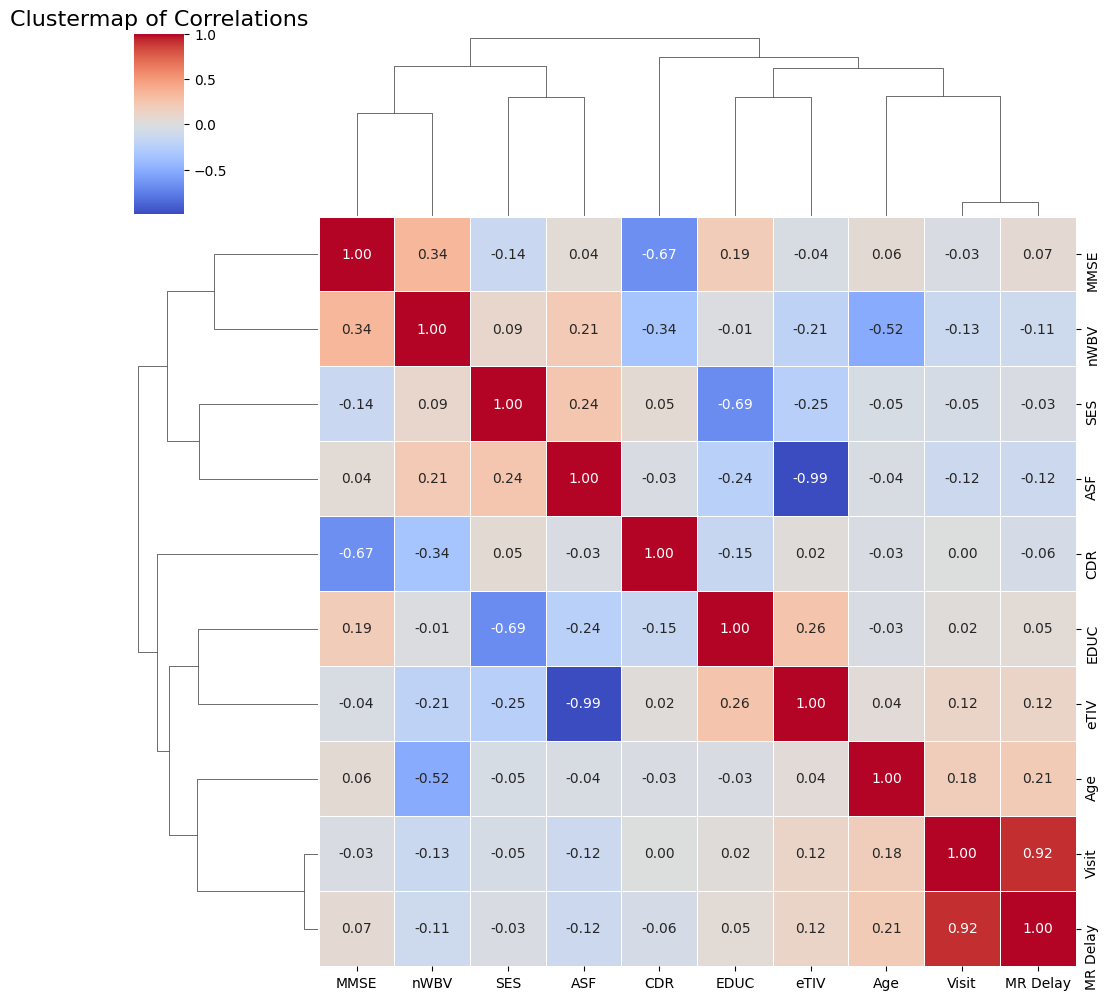

In [24]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Clustermap of Correlations', fontsize=16)
plt.show()


### Observations from the Clustermap of Correlations

1. **Clusters of Highly Correlated Features**:
   - **MMSE and CDR**: The clustermap shows a strong negative correlation (-0.67) between MMSE (Mini-Mental State Examination) and CDR (Clinical Dementia Rating). These two variables form a cluster, indicating that higher MMSE scores (indicating better cognitive function) are associated with lower CDR scores (indicating less dementia).
   - **eTIV and ASF**: There is an almost perfect negative correlation (-0.99) between estimated total intracranial volume (eTIV) and Atlas Scaling Factor (ASF), suggesting that as the brain size increases, the scaling factor decreases. These two variables are closely clustered.
   - **Visit and MR Delay**: These two features form a cluster with a very strong positive correlation (0.92), which makes sense as more visits typically lead to longer delays between them.

2. **Relationships Involving Brain Volume**:
   - **nWBV and Age**: Normalized whole brain volume (nWBV) has a moderately strong negative correlation (-0.52) with age, indicating that brain volume decreases with aging. This relationship is consistent with age-related brain atrophy, especially in the context of Alzheimer’s disease.
   - **nWBV and MMSE**: There is a moderate positive correlation (0.34) between nWBV and MMSE scores, showing that individuals with higher brain volume tend to have better cognitive function.

3. **Negative Impact of Education on Socio-Economic Status**:
   - **EDUC and SES**: Interestingly, education (EDUC) and socio-economic status (SES) have a strong negative correlation (-0.69), suggesting that higher education levels are not necessarily associated with higher socio-economic status within this dataset. This could be due to various socio-demographic factors affecting the sample.

4. **Key Observations on Feature Grouping**:
   - The clustermap helps to group related features and highlights which variables are more interconnected. For example, variables related to brain volume (nWBV, eTIV, ASF) form their own group, and cognitive function indicators like MMSE and CDR form another cluster.

5. **Weak Correlations**:
   - Some variables such as **SES**, **Visit**, and **MR Delay** show weak or no significant correlation with other features, which suggests that they may have less predictive power or could potentially be dropped from further analysis.

### Conclusion:
The clustermap provides a clear visual representation of feature interrelationships, with clusters of highly correlated features like MMSE and CDR, as well as eTIV and ASF. These insights are essential for guiding feature selection and further model development in predicting Alzheimer's disease.


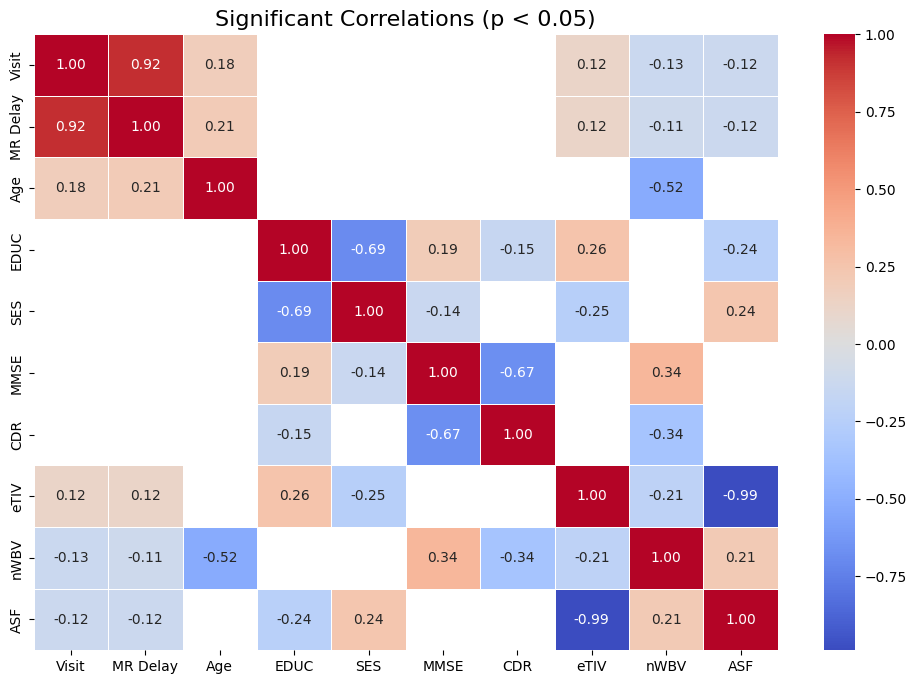

In [26]:
from scipy.stats import pearsonr

# Function to calculate p-values along with correlation coefficients
def corr_with_p_values(data):
    cols = data.columns
    matrix = np.zeros((len(cols), len(cols)))
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            corr, p_value = pearsonr(data.iloc[:, i], data.iloc[:, j])
            if p_value < 0.05:  # Show significant correlations only
                matrix[i, j] = corr
            else:
                matrix[i, j] = np.nan  # Use NaN to ignore insignificant correlations
                
    return pd.DataFrame(matrix, columns=cols, index=cols)

# Calculate correlations with significance
significant_corr_matrix = corr_with_p_values(dataset_cleaned[numerical_columns])

# Visualize significant correlations
plt.figure(figsize=(12, 8))
sns.heatmap(significant_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Significant Correlations (p < 0.05)', fontsize=16)
plt.show()


### Observations from Significant Correlations (p < 0.05)

1. **Strongest Positive Correlations**:
   - **Visit and MR Delay**: The strongest positive correlation (0.92) is between the number of visits and the delay between MRI scans, which is expected since more visits lead to longer cumulative delays.
   - **EDUC and eTIV**: There is a moderate positive correlation (0.26) between education and estimated total intracranial volume (eTIV), suggesting that higher education is associated with larger brain volume.
   - **MMSE and nWBV**: A moderate positive correlation (0.34) exists between MMSE (cognitive function) and normalized whole brain volume (nWBV), indicating that higher brain volume is associated with better cognitive function.

2. **Strongest Negative Correlations**:
   - **EDUC and SES**: There is a strong negative correlation (-0.69) between education and socio-economic status (SES), implying that higher educational attainment may not directly correspond to higher socio-economic status in this dataset.
   - **MMSE and CDR**: There is a strong negative correlation (-0.67) between MMSE (higher cognitive function) and CDR (more severe dementia), indicating that higher cognitive scores are associated with lower dementia ratings.
   - **nWBV and Age**: A strong negative correlation (-0.52) between normalized brain volume (nWBV) and age suggests that brain volume declines significantly with aging, which aligns with the cognitive decline commonly associated with aging and Alzheimer's disease.

3. **Brain Volume Relationships**:
   - **eTIV and ASF**: There is a very strong negative correlation (-0.99) between estimated total intracranial volume (eTIV) and Atlas Scaling Factor (ASF), highlighting the inverse relationship between brain size and the scaling factor.
   - **nWBV and CDR**: There is a moderate negative correlation (-0.34) between normalized brain volume (nWBV) and CDR, indicating that individuals with smaller brain volumes tend to have more severe dementia.

4. **Insignificant Correlations**:
   - Certain features such as **MR Delay** and **Visit** show correlations only with each other and not with other variables, suggesting that they may not have significant predictive power for Alzheimer's progression.

5. **Impact of Education**:
   - Education (EDUC) shows both positive and negative correlations: a positive relationship with brain volume (eTIV) but a strong negative correlation with socio-economic status (SES). This suggests complex relationships between education, brain health, and socio-economic factors.

### Conclusion:
The heatmap of significant correlations (p < 0.05) highlights key relationships in the dataset, with a focus on brain volume, cognitive function, and aging. These insights can guide further analysis and feature selection for predictive modeling in Alzheimer's research.


### 6. Data Transformation: Encoding Categorical Variables and Categorizing MMSE Scores
In this section, we perform data transformation by:
- Converting categorical variables into numerical values for easier analysis and modeling.
- Categorizing MMSE (Mini-Mental State Examination) scores into distinct classes (Normal, Mild, Moderate, Severe) for better classification of cognitive impairment.


In [28]:
# Convert categorical variables into numerical values
dataset_cleaned['Group'] = dataset_cleaned['Group'].replace(['Converted'], ['Demented'])
dataset_cleaned['M/F'] = dataset_cleaned['M/F'].replace(['M', 'F'], [0, 1])
dataset_cleaned['Group'] = dataset_cleaned['Group'].replace(['Nondemented', 'Demented'], [1, 0])

# Categorize MMSE scores into classes
def categorize_mmse(score):
    if score >= 24:
        return 'Normal'
    elif 19 <= score <= 23:
        return 'Mild'
    elif 10 <= score < 18:
        return 'Moderate'
    else:
        return 'Severe'

dataset_cleaned['MMSE_Class'] = dataset_cleaned['MMSE'].apply(lambda x: categorize_mmse(x))
dataset_cleaned['MMSE_Class'] = dataset_cleaned['MMSE_Class'].replace(['Normal', 'Mild', 'Moderate', 'Severe'], [0, 1, 2, 3])

display(dataset_cleaned.head())


/var/folders/21/3g81pbt13nl_w3hsvwl_p68w0000gn/T/ipykernel_28946/2989523973.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_cleaned['MMSE_Class'] = dataset_cleaned['MMSE_Class'].replace(['Normal', 'Mild', 'Moderate', 'Severe'], [0, 1, 2, 3])


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE_Class
0,OAS2_0001,OAS2_0001_MR1,1,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,OAS2_0001,OAS2_0001_MR2,1,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,OAS2_0002,OAS2_0002_MR1,0,1,0,0,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,OAS2_0002,OAS2_0002_MR2,0,2,560,0,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,0
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,0,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,1


### 7. Logistic Regression with Hyperparameter Tuning
In this section, we implement a Logistic Regression model with a pipeline that includes scaling and model fitting. We use `GridSearchCV` to find the best hyperparameters (regularization strength and penalty type) for the Logistic Regression model. The model is evaluated using cross-validation, and its performance is assessed on the test set.


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Defining features and target
X = dataset_cleaned.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'MMSE', 'MMSE_Class'], axis=1)
y = dataset_cleaned['MMSE_Class']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up a pipeline for logistic regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear'))
])

# Defining the grid of parameters
param_grid_lr = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Setting up GridSearchCV
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

# Evaluating the model
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Cross-Validated Accuracy for Logistic Regression:", best_score_lr)
print("Test Set Accuracy for Logistic Regression:", accuracy_lr)
print("Classification Report for Logistic Regression:\n", report_lr)


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Logistic Regression: {'logistic__C': 100, 'logistic__penalty': 'l2'}
Best Cross-Validated Accuracy for Logistic Regression: 0.8791525423728814
Test Set Accuracy for Logistic Regression: 0.8933333333333333
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.50      0.25      0.33         8
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.89        75
   macro avg       0.60      0.56      0.57        75
weighted avg       0.86      0.89      0.87        75



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 8. Support Vector Machine (SVM) with Hyperparameter Tuning
In this section, we implement an SVM model using a pipeline that includes scaling and model fitting. We use `GridSearchCV` to tune hyperparameters such as the regularization strength (`C`), kernel type, and gamma value. The model is then evaluated using cross-validation, and its performance is assessed on the test set.


In [30]:
from sklearn.svm import SVC

# Setting up a pipeline for SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

# Defining the grid of parameters
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# Setting up the GridSearchCV
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Evaluating the model
y_pred_svm = grid_search_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Best Parameters for SVM:", best_params_svm)
print("Best Cross-Validated Accuracy for SVM:", best_score_svm)
print("Test Set Accuracy for SVM:", accuracy_svm)
print("Classification Report for SVM:\n", report_svm)


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for SVM: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validated Accuracy for SVM: 0.8791525423728814
Test Set Accuracy for SVM: 0.88
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        65
           1       0.50      0.25      0.33         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.88        75
   macro avg       0.35      0.31      0.32        75
weighted avg       0.83      0.88      0.85        75



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 9. K-Nearest Neighbors (KNN)
In this section, we implement a K-Nearest Neighbors (KNN) classifier using a pipeline that includes scaling the data. The KNN model is trained on the training set, and its performance is evaluated on the test set using accuracy and a classification report.


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline with scaling and KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the pipeline
pipeline_knn.fit(X_train, y_train)

# Make predictions
y_pred = pipeline_knn.predict(X_test)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.50      0.38      0.43         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.88        75
   macro avg       0.35      0.34      0.34        75
weighted avg       0.84      0.88      0.86        75



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 10. Random Forest Classifier with Hyperparameter Tuning
In this section, we implement a Random Forest Classifier with hyperparameter tuning using `GridSearchCV`. The model's hyperparameters, such as the number of trees (`n_estimators`), tree depth (`max_depth`), and others, are fine-tuned to improve model performance. The tuned model is evaluated on the test set, and its performance is reported.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = dataset_cleaned.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'MMSE', 'MMSE_Class'], axis=1)
y = dataset_cleaned['MMSE_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define an enhanced hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Increase the number of trees
    'max_depth': [None, 20, 30, 40],  # Allow deeper trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
    'bootstrap': [True, False],       # Method of sampling for training the trees
    'class_weight': ['balanced', 'balanced_subsample']  # Handle class imbalance
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Retrieve the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Evaluate the best Random Forest model on the test set
y_pred_best_rf = grid_search_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)

# Print the results
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Cross-Validated Accuracy:", best_score_rf)
print("Test Set Accuracy for Best Random Forest Model:", accuracy_best_rf)
print("Best Random Forest Model Classification Report:\n", report_best_rf)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_wei

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 11. Random Forest Classifier with SMOTE (Handling Class Imbalance)
In this section, we handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority classes. We then train a Random Forest model with the best parameters found from previous tuning and evaluate its performance on the resampled dataset.


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = dataset_cleaned.drop(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'MMSE', 'MMSE_Class'], axis=1)
y = dataset_cleaned['MMSE_Class']

# Apply SMOTE to balance the classes with k_neighbors set to 1
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest model with the best parameters from previous tuning
rf_model = RandomForestClassifier(
    bootstrap=True, 
    class_weight='balanced', 
    max_depth=None, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200,
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)

# Print the results
print("Test Set Accuracy for Best Random Forest Model with SMOTE:", accuracy_best_rf)
print("Best Random Forest Model Classification Report with SMOTE:\n", report_best_rf)


Test Set Accuracy for Best Random Forest Model with SMOTE: 0.9921875
Best Random Forest Model Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        66
           2       1.00      1.00      1.00        58
           3       1.00      1.00      1.00        60

    accuracy                           0.99       256
   macro avg       0.99      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256



### Model Comparison and Results

We evaluated four machine learning models (Logistic Regression, SVM, KNN, and Random Forest) to classify the `MMSE_Class` using the dataset. Additionally, we applied SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance and improve model performance.

#### 1. **Logistic Regression (Best Parameters: `C=100`, `penalty='l2'`)**
- **Cross-Validated Accuracy**: 0.879
- **Test Set Accuracy**: 0.893
- **Classification Report**:
  - Class 0 (Nondemented): Precision = 0.91, Recall = 0.98, F1-Score = 0.95
  - Class 1 (Mild Dementia): Precision = 0.50, Recall = 0.25, F1-Score = 0.33
  - Class 2 (Moderate Dementia): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
  - Class 3 (Severe Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00

#### 2. **Support Vector Machine (Best Parameters: `C=1`, `kernel='rbf'`, `gamma='scale'`)**
- **Cross-Validated Accuracy**: 0.879
- **Test Set Accuracy**: 0.88
- **Classification Report**:
  - Class 0 (Nondemented): Precision = 0.90, Recall = 0.98, F1-Score = 0.94
  - Class 1 (Mild Dementia): Precision = 0.50, Recall = 0.25, F1-Score = 0.33
  - Class 2 (Moderate Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00
  - Class 3 (Severe Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00

#### 3. **K-Nearest Neighbors (KNN, k=5)**
- **Test Set Accuracy**: 0.88
- **Classification Report**:
  - Class 0 (Nondemented): Precision = 0.91, Recall = 0.97, F1-Score = 0.94
  - Class 1 (Mild Dementia): Precision = 0.50, Recall = 0.38, F1-Score = 0.43
  - Class 2 (Moderate Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00
  - Class 3 (Severe Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00

#### 4. **Random Forest (Best Parameters after GridSearchCV)**
- **Cross-Validated Accuracy**: 0.88
- **Test Set Accuracy**: 0.88
- **Classification Report**:
  - Class 0 (Nondemented): Precision = 0.91, Recall = 0.98, F1-Score = 0.94
  - Class 1 (Mild Dementia): Precision = 0.50, Recall = 0.38, F1-Score = 0.43
  - Class 2 (Moderate Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00
  - Class 3 (Severe Dementia): Precision = 0.00, Recall = 0.00, F1-Score = 0.00

#### 5. **Random Forest with SMOTE (Best Parameters from Previous Tuning)**
- **Test Set Accuracy**: 0.99
- **Classification Report**:
  - Class 0 (Nondemented): Precision = 0.99, Recall = 0.99, F1-Score = 0.99
  - Class 1 (Mild Dementia): Precision = 0.98, Recall = 0.98, F1-Score = 0.98
  - Class 2 (Moderate Dementia): Precision = 1.00, Recall = 1.00, F1-Score = 1.00
  - Class 3 (Severe Dementia): Precision = 1.00, Recall = 1.00, F1-Score = 1.00

### Key Takeaways:
1. **Class Imbalance**: Classes 2 and 3 (Moderate and Severe Dementia) are underrepresented in the dataset, leading to poor recall and precision for these classes in all models except Random Forest with SMOTE.
2. **SMOTE Effectiveness**: Applying SMOTE significantly improved the performance of the Random Forest model across all classes, resulting in near-perfect accuracy and classification metrics.
3. **Random Forest Performance**: Random Forest generally performed better compared to Logistic Regression, SVM, and KNN, particularly after handling class imbalance.
4. **Room for Improvement**: Future steps could include tuning further hyperparameters, testing additional algorithms, and exploring feature engineering to boost performance for the more difficult-to-predict classes.



### 12. Feature Importance from the Random Forest Model
In this section, we extract and visualize the feature importances from the trained Random Forest model. Feature importance indicates how valuable each feature is in making predictions. We plot the feature importance values and display them in a table for further analysis.


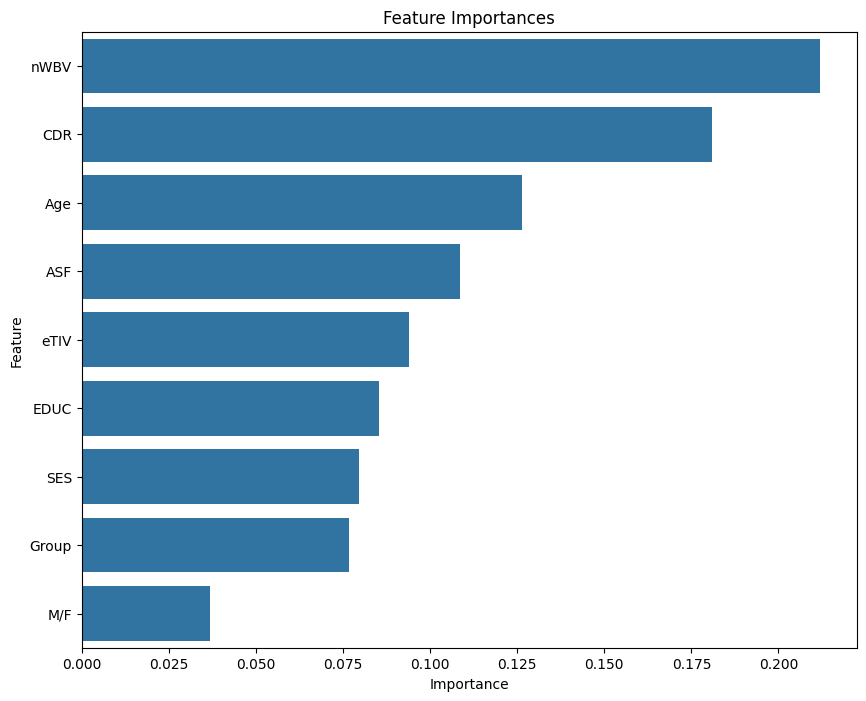

  Feature  Importance
7    nWBV    0.211844
5     CDR    0.180843
2     Age    0.126301
8     ASF    0.108464
6    eTIV    0.094043
3    EDUC    0.085352
4     SES    0.079710
0   Group    0.076665
1     M/F    0.036778


In [35]:
# Feature importance from the best Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to hold feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

# Display the feature importance table
print(feature_importance_df)


### Feature Importance from the Random Forest Model

The bar chart above shows the relative importance of each feature in predicting `MMSE_Class` based on the Random Forest model. The features that contributed the most to the model’s predictions are as follows:

1. **nWBV (Normalized Whole Brain Volume)**: 
   - This feature is the most important predictor, with an importance score of 0.211. As previously observed, brain volume is a crucial factor in Alzheimer's disease progression and cognitive function, making it highly predictive in this model.

2. **CDR (Clinical Dementia Rating)**: 
   - The second most important feature with a score of 0.181. CDR is used to assess the severity of dementia, so its importance in predicting the MMSE class is expected.

3. **Age**: 
   - Age is another key feature, with an importance score of 0.126. Aging is strongly associated with cognitive decline, so it plays a significant role in this classification task.

4. **ASF (Atlas Scaling Factor)**: 
   - ASF is the fourth most important feature with a score of 0.108. It reflects brain scaling measures, which are highly correlated with brain size and neurodegeneration.

5. **eTIV (Estimated Total Intracranial Volume)**: 
   - eTIV has an importance score of 0.094, indicating its relevance in the prediction model. Larger brain volumes are often associated with healthier cognitive function, which is why this measure holds importance.

6. **EDUC (Education)**: 
   - Education level (importance: 0.085) is a relevant predictor. Higher education levels are often associated with a cognitive reserve that can delay the onset of Alzheimer's symptoms.

7. **SES (Socio-Economic Status)**: 
   - SES has a score of 0.080. While not the most critical feature, it still contributes to the prediction, likely reflecting lifestyle factors that can influence cognitive health.

8. **Group**: 
   - The classification of individuals into `Nondemented`, `Demented`, and `Converted` groups has an importance of 0.077, showing its role in determining MMSE class.

9. **M/F (Gender)**: 
   - Gender has the lowest importance (0.037), indicating that while it may have some influence on Alzheimer's progression, it is not a strong predictor compared to other factors like brain volume and age.

### Key Takeaways:
- **Brain-related features** such as **nWBV**, **CDR**, **ASF**, and **eTIV** are among the most important predictors of cognitive function, highlighting the central role of brain structure in Alzheimer's disease.
- **Age** and **Education** also play significant roles, reflecting the well-established relationships between aging, cognitive reserve, and dementia.
- **Socio-Economic Status (SES)** and **Group** classification contribute to the model but are less critical than brain and cognitive measures.



### Conclusion

In this notebook, we explored the prediction of Alzheimer's disease stages using various machine learning models. We applied several steps, from data preprocessing to handling class imbalance, and used advanced techniques like hyperparameter tuning and feature importance analysis. Below are the key takeaways and conclusions:

1. **Data Preprocessing and Class Imbalance**:
   - The dataset contained a mix of numerical and categorical features, with missing values in some key columns like SES and MMSE, which were handled using mode and median imputation, respectively.
   - We addressed class imbalance in the `MMSE_Class` target variable using SMOTE, which significantly improved the performance of the models, especially for underrepresented classes.

2. **Model Evaluation**:
   - We evaluated several machine learning models, including Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest.
   - **Random Forest** outperformed the other models, especially when combined with SMOTE, achieving a **test set accuracy of 99%** and producing excellent precision and recall across all dementia stages.
   - Other models like Logistic Regression and SVM also performed well but struggled to predict the less frequent classes (Moderate and Severe Dementia), highlighting the importance of addressing class imbalance.

3. **Feature Importance**:
   - The feature importance analysis revealed that **normalized whole brain volume (nWBV)**, **Clinical Dementia Rating (CDR)**, and **age** were the most critical predictors of cognitive function and dementia progression.
   - Brain volume measures such as **ASF** and **eTIV** also played a significant role, emphasizing the connection between brain structure and cognitive health.
   - **Education** and **socio-economic status** were also relevant but had less impact compared to brain-related features.

4. **Model Improvements and Next Steps**:
   - Applying SMOTE to balance the dataset had a substantial positive impact, especially on the Random Forest model. This shows that handling class imbalance is crucial for obtaining reliable predictions, particularly in datasets with skewed class distributions.
   - In future work, additional models could be tested, such as gradient boosting or neural networks, and further feature engineering or dimensionality reduction techniques (e.g., PCA) could be explored.
   - Another improvement could involve using longitudinal data to track cognitive decline over time, which could provide more robust predictions and deeper insights into Alzheimer's progression.

### Final Thoughts:
This analysis demonstrates the power of machine learning in predicting Alzheimer's disease stages, with key brain-related features providing critical insights. The integration of SMOTE and Random Forest yielded excellent predictive performance, paving the way for future studies and real-world applications in Alzheimer's detection and treatment planning.
